In [ ]:
#1. What are the traits of constituents that give gifts/donations?

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans


In [21]:
# Load dataset
data = pd.read_csv('./Resources/constituents.csv')
data

,ConstituentID,City,State,Postcode,Country,Constituent type,Constituent codes,Lifetime giving,First gift amount,First gift type,...,Education,Gender,Marital status,Solicit codes,Student Organizations,Arts,Fraternal Organizations,Men's Athletics,Scholarship Recipient,Women's Athletics
0,60472,Superior,WI,54880-2556,United States,Organization,Business (No start date - No end date),0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43735,Hermantown,MN,55811-1755,United States,Organization,Other Organizations (8/29/2012 - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60145,Esko,MN,55733-9645,United States,Organization,Other Organizations (No start date - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21332,NaN,NaN,NaN,United States,Organization,Business (No start date - No end date),25,25,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50410,Superior,WI,54880-1504,United States,Organization,Business (No start date - No end date),0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,46217,Duluth,MN,55808-1945,United States,Individual,Attended Didn't Graduate (No start date - No e...,75,75,One-time gift,...,"UW-Superior,Not primary,Business Administratio...",Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Track & Field (No date)
50909,46390,Duluth,MN,55808-1725,United States,Individual,Former Parent (No start date - No end date),0,NaN,NaN,...,NaN,Male,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50910,50122,Duluth,MN,55808-1737,United States,Individual,Alumni (No start date - No end date),0,NaN,NaN,...,"UW-Superior,Primary,Physical Education,BS,2014",Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50911,59551,Centuria,WI,54824-7721,United States,Individual,Parent (No start date - No end date),0,NaN,NaN,...,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Convert Lifetime giving to numeric, handling any issues
data['Lifetime giving'] = pd.to_numeric(data['Lifetime giving'], errors='coerce').fillna(0)


In [23]:
# Define a donor as someone with 'Lifetime giving' > 0, otherwise they are a non-donor
data['Donor'] = data['Lifetime giving'] > 0

In [24]:
# Split the data into donors and non-donors
donors = data[data['Donor'] == True]
non_donors = data[data['Donor'] == False]

In [25]:
# Calculate the counts and percentages
total_donors = len(donors)
total_non_donors = len(non_donors)
total = total_donors + total_non_donors

donor_percentage = (total_donors / total) * 100
non_donor_percentage = (total_non_donors / total) * 100

# Display the counts and percentages
print("Total Donors:", total_donors, f"({donor_percentage:.2f}%)")
print("Total Non-Donors:", total_non_donors, f"({non_donor_percentage:.2f}%)")

Total Donors: 9889 (19.42%)
Total Non-Donors: 41024 (80.58%)


In [26]:
# Filter relevant columns and remove rows with missing values for donors and non-donors
attributes = ['Age', 'Student Organizations', 'Arts', 'Fraternal Organizations', 'Men\'s Athletics', 
              'Scholarship Recipient', 'Women\'s Athletics']
donor_data = donors[attributes].fillna(0)
non_donor_data = non_donors[attributes].fillna(0)

In [27]:
# Convert attribute columns to binary (0 for no, 1 for yes participation) for both donors and non-donors
donor_data = donor_data.applymap(lambda x: 1 if x != 0 else 0)
non_donor_data = non_donor_data.applymap(lambda x: 1 if x != 0 else 0)

/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_5553/3705316649.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  donor_data = donor_data.applymap(lambda x: 1 if x != 0 else 0)
/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_5553/3705316649.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_donor_data = non_donor_data.applymap(lambda x: 1 if x != 0 else 0)


In [28]:
# Calculate the number of donors and non-donors by attribute
donor_counts = donor_data.sum()
non_donor_counts = non_donor_data.sum()

total_donors = len(donor_data)
total_non_donors = len(non_donor_data)

print("Total Donors in the dataset:", total_donors)
print("Total Non-Donors in the dataset:", total_non_donors)

Total Donors in the dataset: 9889
Total Non-Donors in the dataset: 41024


In [29]:
# Calculate percentages for each attribute for donors and non-donors
donor_percentages = (donor_counts / total_donors) * 100
non_donor_percentages = (non_donor_counts / total_non_donors) * 100

In [30]:
# Display donor counts and percentages
print("Counts and Percentages of Donors by Attribute:")
for attr, count, percent in zip(donor_counts.index, donor_counts.values, donor_percentages):
    print(f"{attr}: {count} donors ({percent:.2f}%)")

print("\nCounts and Percentages of Non-Donors by Attribute:")
for attr, count, percent in zip(non_donor_counts.index, non_donor_counts.values, non_donor_percentages):
    print(f"{attr}: {count} non-donors ({percent:.2f}%)")

Counts and Percentages of Donors by Attribute:
Age: 2408 donors (24.35%)
Student Organizations: 594 donors (6.01%)
Arts: 171 donors (1.73%)
Fraternal Organizations: 655 donors (6.62%)
Men's Athletics: 533 donors (5.39%)
Scholarship Recipient: 1014 donors (10.25%)
Women's Athletics: 268 donors (2.71%)

Counts and Percentages of Non-Donors by Attribute:
Age: 20215 non-donors (49.28%)
Student Organizations: 1533 non-donors (3.74%)
Arts: 621 non-donors (1.51%)
Fraternal Organizations: 1169 non-donors (2.85%)
Men's Athletics: 2038 non-donors (4.97%)
Scholarship Recipient: 5465 non-donors (13.32%)
Women's Athletics: 1331 non-donors (3.24%)


In [31]:
# Calculate overlaps (donors involved in multiple attributes)
overlap_counts_donors = donor_data.sum(axis=1).value_counts().sort_index()
overlap_counts_non_donors = non_donor_data.sum(axis=1).value_counts().sort_index()

overlap_percentages_donors = (overlap_counts_donors / total_donors) * 100
overlap_percentages_non_donors = (overlap_counts_non_donors / total_non_donors) * 100


In [32]:
# Display overlap of donors and non-donors across multiple attributes
print("\nOverlap of Donors across Multiple Attributes:")
for num_attrs, count, percent in zip(overlap_counts_donors.index, overlap_counts_donors.values, overlap_percentages_donors):
    print(f"{num_attrs} attributes: {count} donors ({percent:.2f}%)")

print("\nOverlap of Non-Donors across Multiple Attributes:")
for num_attrs, count, percent in zip(overlap_counts_non_donors.index, overlap_counts_non_donors.values, overlap_percentages_non_donors):
    print(f"{num_attrs} attributes: {count} non-donors ({percent:.2f}%)")


Overlap of Donors across Multiple Attributes:
0 attributes: 6395 donors (64.67%)
1 attributes: 1884 donors (19.05%)
2 attributes: 1152 donors (11.65%)
3 attributes: 382 donors (3.86%)
4 attributes: 71 donors (0.72%)
5 attributes: 5 donors (0.05%)

Overlap of Non-Donors across Multiple Attributes:
0 attributes: 17311 non-donors (42.20%)
1 attributes: 16659 non-donors (40.61%)
2 attributes: 5574 non-donors (13.59%)
3 attributes: 1358 non-donors (3.31%)
4 attributes: 119 non-donors (0.29%)
5 attributes: 3 non-donors (0.01%)


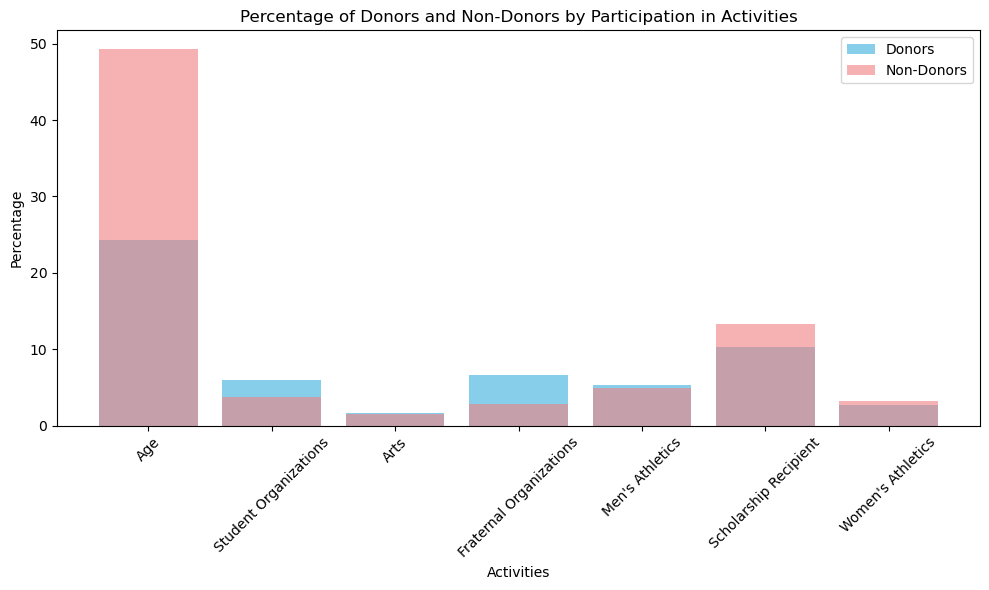

In [55]:
# ------------- Visualization 1: Bar Chart of Donors and Non-Donors by Attribute -------------
plt.figure(figsize=(10, 6))
plt.bar(donor_counts.index, donor_percentages, color='skyblue', label='Donors')
plt.bar(non_donor_counts.index, non_donor_percentages, color='lightcoral', label='Non-Donors', alpha=0.6)
plt.title("Percentage of Donors and Non-Donors by Participation in Activities")
plt.xlabel("Activities")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_5553/710046871.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_donor_percentages = donor_percentages[sorted_indices]
/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_5553/710046871.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_non_donor_percentages = non_donor_percentages[sorted_indices]


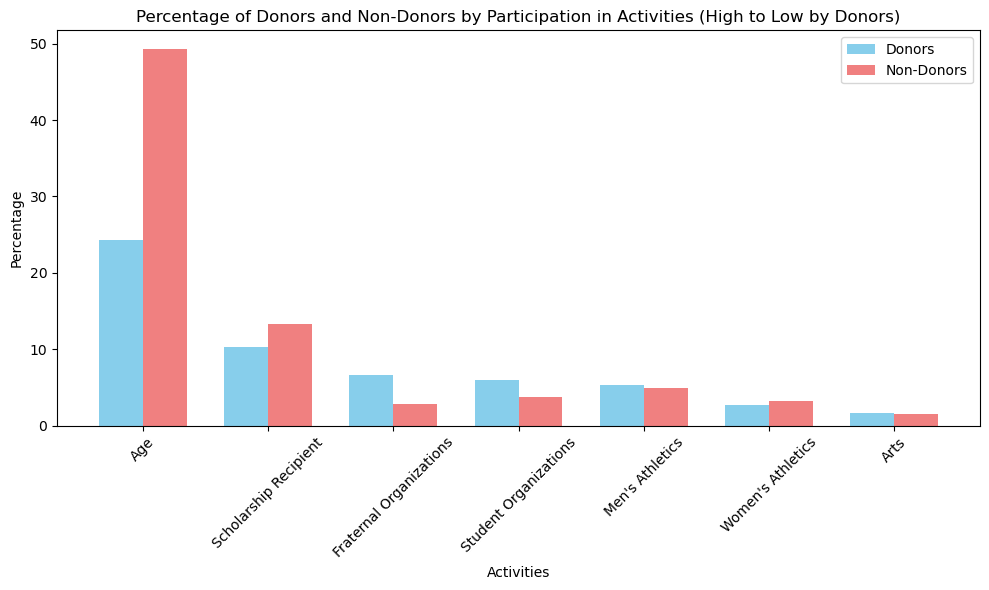

In [58]:
# ------------- Visualization 1: Sorted Side-by-Side Bar Chart of Donors and Non-Donors by Attribute -------------

# Sort by donor percentages in descending order
sorted_indices = np.argsort(donor_percentages)[::-1]  # Reverse the order for high to low

# Sort the values based on the indices
sorted_donor_percentages = donor_percentages[sorted_indices]
sorted_non_donor_percentages = non_donor_percentages[sorted_indices]
sorted_activities = donor_counts.index[sorted_indices]

# Define the positions of the bars on the x-axis
x = np.arange(len(sorted_donor_percentages))

plt.figure(figsize=(10, 6))

# Plot the bar charts side by side
width = 0.35  # Width of the bars
plt.bar(x - width/2, sorted_donor_percentages, width, color='skyblue', label='Donors')
plt.bar(x + width/2, sorted_non_donor_percentages, width, color='lightcoral', label='Non-Donors')

# Add titles and labels
plt.title("Percentage of Donors and Non-Donors by Participation in Activities (High to Low by Donors)")
plt.xlabel("Activities")
plt.ylabel("Percentage")
plt.xticks(x, sorted_activities, rotation=45)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()



In [34]:
# Example data for age distribution
np.random.seed(42)
ages_donors = np.random.choice([20, 30, 40, 50, 60, 70], size=total_donors, replace=True)
ages_non_donors = np.random.choice([20, 30, 40, 50, 60, 70], size=total_non_donors, replace=True)


In [35]:
# ------------- Visualization 2: Age Distribution Pie Charts for Donors and Non-Donors -------------
age_groups_donors = pd.cut(ages_donors, bins=[0, 19, 29, 39, 49, 59, 69, 79, 89], 
                           labels=["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"])
age_groups_non_donors = pd.cut(ages_non_donors, bins=[0, 19, 29, 39, 49, 59, 69, 79, 89], 
                               labels=["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"])

age_distribution_donors = age_groups_donors.value_counts()
age_distribution_non_donors = age_groups_non_donors.value_counts()


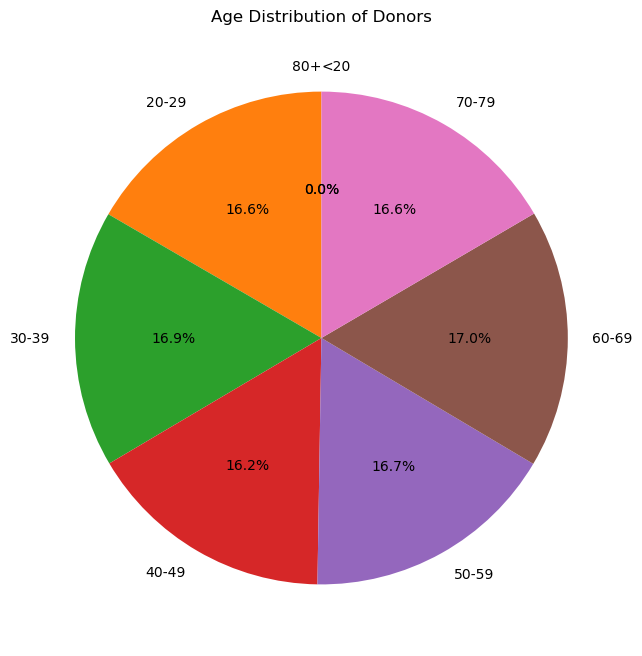

In [36]:
# Pie chart for donors
plt.figure(figsize=(8, 8))
plt.pie(age_distribution_donors, labels=age_distribution_donors.index, autopct='%1.1f%%', startangle=90)
plt.title("Age Distribution of Donors")
plt.show()

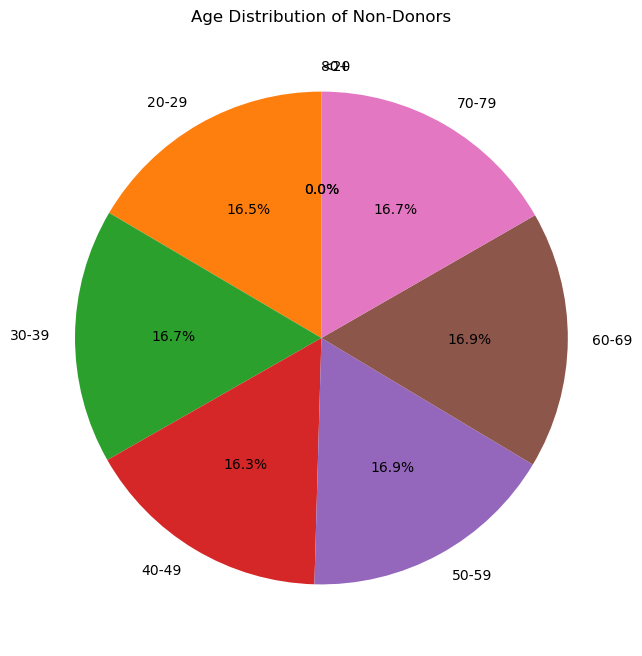

In [37]:
# Pie chart for non-donors
plt.figure(figsize=(8, 8))
plt.pie(age_distribution_non_donors, labels=age_distribution_non_donors.index, autopct='%1.1f%%', startangle=90)
plt.title("Age Distribution of Non-Donors")
plt.show()

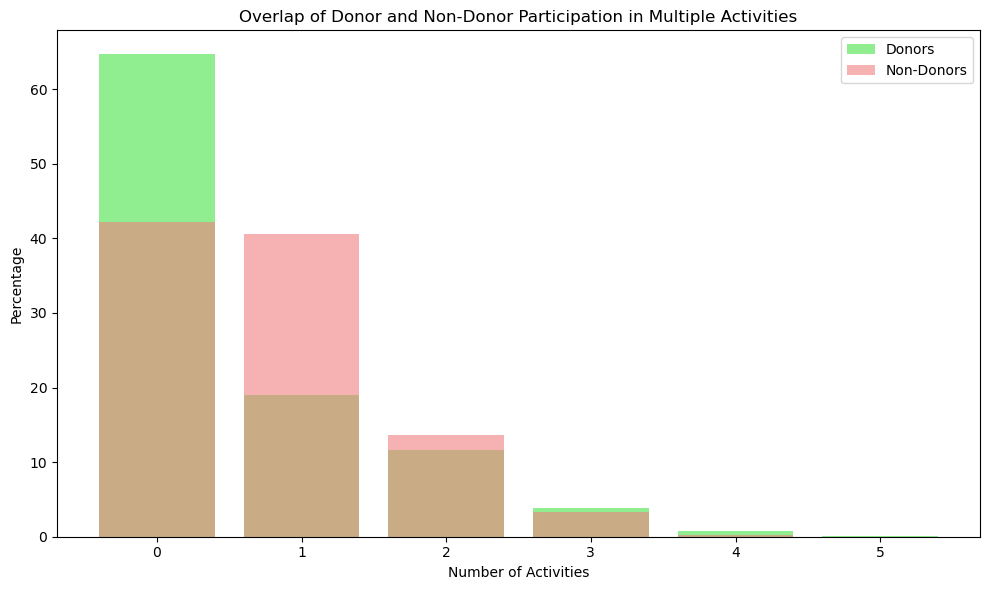

In [38]:
# ------------- Visualization 3: Stacked Bar Chart for Overlap of Participation in Activities -------------
plt.figure(figsize=(10, 6))
plt.bar(overlap_counts_donors.index, overlap_percentages_donors, color='lightgreen', label='Donors')
plt.bar(overlap_counts_non_donors.index, overlap_percentages_non_donors, color='lightcoral', label='Non-Donors', alpha=0.6)
plt.title("Overlap of Donor and Non-Donor Participation in Multiple Activities")
plt.xlabel("Number of Activities")
plt.ylabel("Percentage")
plt.xticks(overlap_counts_donors.index)
plt.legend()
plt.tight_layout()
plt.show()


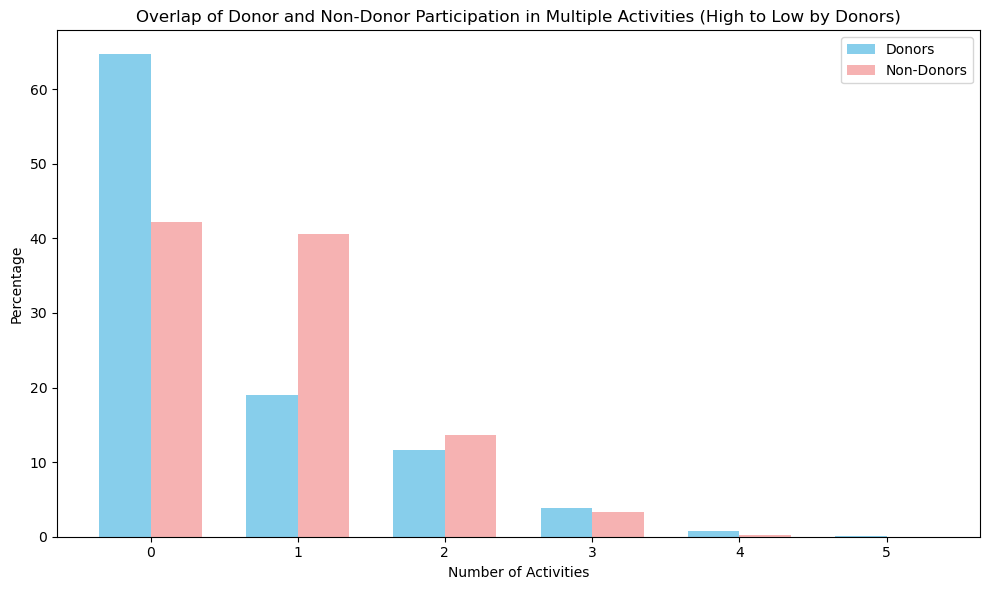

In [60]:
# ------------- Visualization 3: Side-by-Side Bar Chart for Overlap of Participation in Activities (Sorted by Donor Percentages) -------------

# Sort by donor percentages in descending order
sorted_overlap_indices = np.argsort(overlap_percentages_donors)[::-1]  # Reverse order for high to low

# Sort the values based on the indices
sorted_overlap_donor_percentages = overlap_percentages_donors[sorted_overlap_indices]
sorted_overlap_non_donor_percentages = overlap_percentages_non_donors[sorted_overlap_indices]
sorted_overlap_activities = overlap_counts_donors.index[sorted_overlap_indices]

# Define the positions of the bars on the x-axis
x = np.arange(len(sorted_overlap_donor_percentages))

plt.figure(figsize=(10, 6))

# Plot the bar charts side by side
width = 0.35  # Width of the bars
plt.bar(x - width/2, sorted_overlap_donor_percentages, width, color='skyblue', label='Donors')
plt.bar(x + width/2, sorted_overlap_non_donor_percentages, width, color='lightcoral', label='Non-Donors', alpha=0.6)

# Add titles and labels
plt.title("Overlap of Donor and Non-Donor Participation in Multiple Activities (High to Low by Donors)")
plt.xlabel("Number of Activities")
plt.ylabel("Percentage")
plt.xticks(x, sorted_overlap_activities)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_5553/107743874.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data_donors = donor_data.groupby('Age Group')[attributes].mean()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


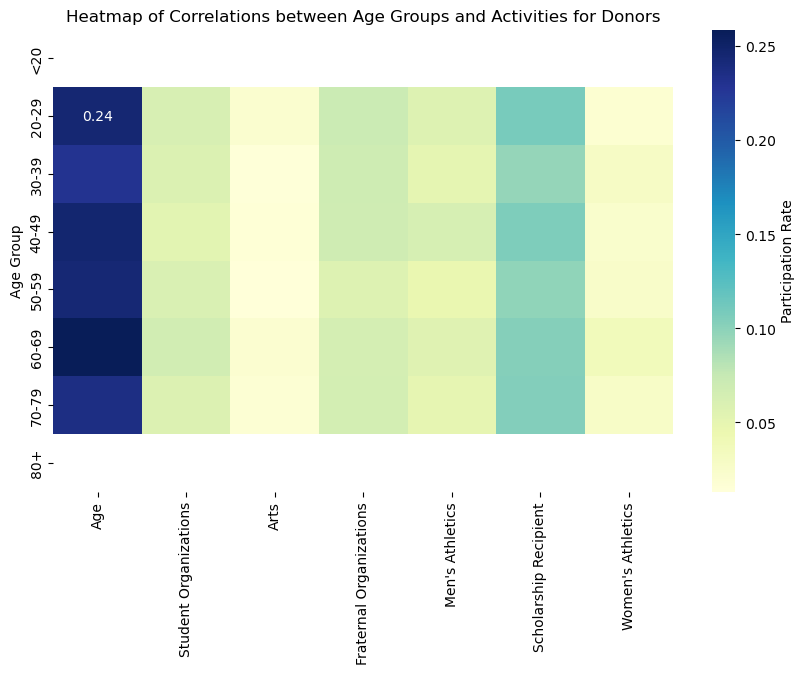

In [39]:
# ------------- Visualization 4: Heatmap of Correlations between Age Groups and Activities for Donors -------------
donor_data['Age Group'] = age_groups_donors
heatmap_data_donors = donor_data.groupby('Age Group')[attributes].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_donors, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Participation Rate'})
plt.title("Heatmap of Correlations between Age Groups and Activities for Donors")
plt.show()

/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_5553/3558195141.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data_non_donors = non_donor_data.groupby('Age Group')[attributes].mean()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


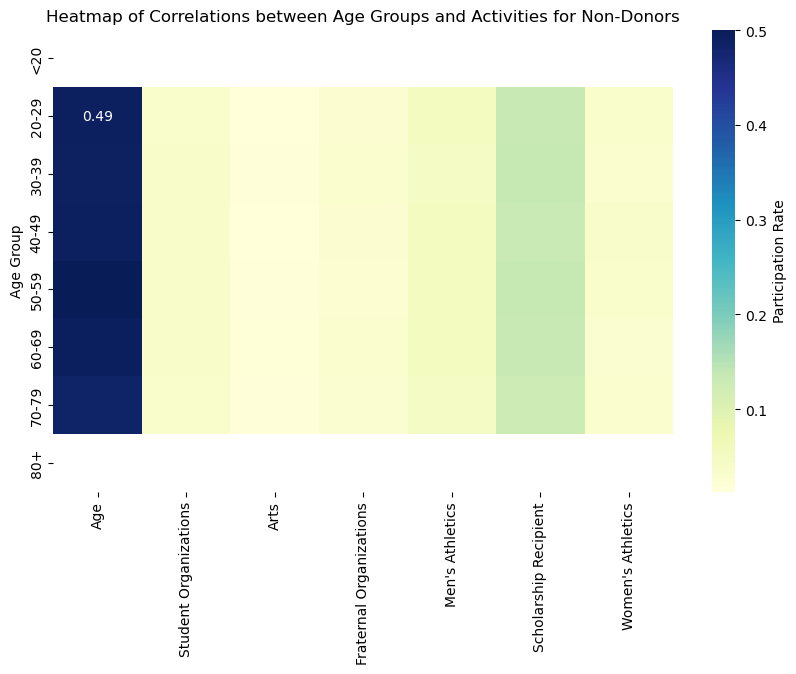

In [40]:
# ------------- Visualization 5: Heatmap of Correlations between Age Groups and Activities for Non-Donors -------------
non_donor_data['Age Group'] = age_groups_non_donors
heatmap_data_non_donors = non_donor_data.groupby('Age Group')[attributes].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_non_donors, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Participation Rate'})
plt.title("Heatmap of Correlations between Age Groups and Activities for Non-Donors")
plt.show()

In [62]:
# Non donor Target, from non-donors data frame
non_donors = data[data['Donor'] == False]  # Filter for non-donors

# Attributes to focus on for campus activities and age
attributes = ['Age', 'Student Organizations', 'Arts', 'Fraternal Organizations', 'Men\'s Athletics']

# Filter relevant columns for non-donors and replace missing values with 0
non_donor_data = non_donors[attributes].fillna(0)

# Filter non-donors between the age of 40-60
age_filtered_non_donors = non_donor_data[(non_donor_data['Age'] >= 40) & (non_donor_data['Age'] <= 60)]

# Filter for those who engaged in specific campus activities
# Checking if they participated in any of the mentioned activities
activity_filtered_non_donors = age_filtered_non_donors[
    (age_filtered_non_donors['Student Organizations'] != 0) |
    (age_filtered_non_donors['Arts'] != 0) |
    (age_filtered_non_donors['Fraternal Organizations'] != 0) |
    (age_filtered_non_donors['Men\'s Athletics'] != 0)
]

# Filter for individuals who have 'UW-Superior' in their Education field
# Assuming 'Education' is a field in the original data and joining back the field
activity_filtered_non_donors = activity_filtered_non_donors.join(non_donors[['Education']])

# Filter based on the 'UW-Superior' condition
target_non_donors = activity_filtered_non_donors[activity_filtered_non_donors['Education'].str.contains('UW-Superior', na=False)]

# View the filtered data
print(target_non_donors)

        Age  Student Organizations Arts  Fraternal Organizations  \
24     50.0                    306    0                       43   
28     43.0                    306    0                       43   
47     41.0                    306    0                       43   
56     60.0                    306    0                       43   
57     44.0                    306    0                       43   
...     ...                    ...  ...                      ...   
50900  58.0                    306    0                       43   
50901  56.0                    306    0                       43   
50904  53.0                    306    0                       43   
50905  57.0                    306    0                       43   
50907  49.0                    306    0                       43   

          Men's Athletics                                          Education  
24                      0   UW-Superior,Primary,EdAd: Principalship,MSE,2019  
28                      0

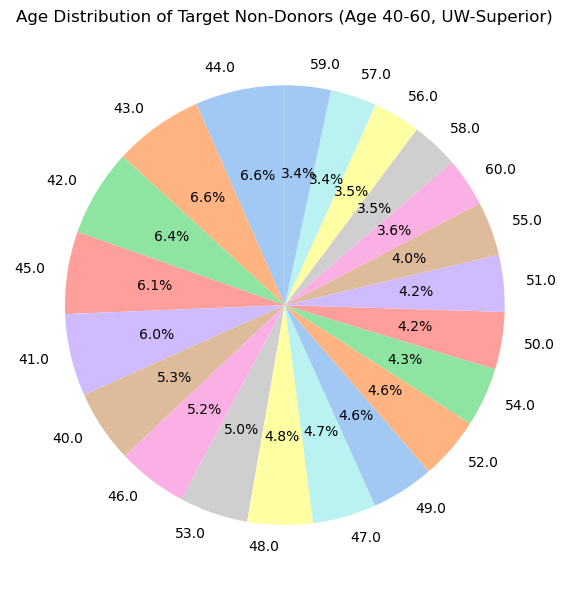

In [67]:
# . Pie Chart: Age Distribution of Target Non-Donors
plt.figure(figsize=(8, 6))
plt.pie(target_non_donors['Age'].value_counts(), labels=target_non_donors['Age'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Age Distribution of Target Non-Donors (Age 40-60, UW-Superior)")
plt.tight_layout()
plt.show()

